In [1]:
import pandas as pd
import numpy as np
import sys
import os

import matplotlib.pyplot as plt
import seaborn as sns

root_dir = '/oak/stanford/groups/horence/rob/isoform_localizations/'

sys.path.append(os.path.join(root_dir,'scripts'))
import spatial_utils
import plot_utils

In [2]:
centroid_df = pd.read_csv('../20210106_centroid_dist_scores.csv',nrows=5000)
centroid_df.head()

,cell_id,target_molecule_name,num_cell_spots,mean_centroid_dist,z_score_centroid_dist
0,10000143038275111136124942858811168393,Adra1b,1,2.779945,-0.476989
1,10000143038275111136124942858811168393,Aqp4,1,3.808437,-0.163907
2,10000143038275111136124942858811168393,Bcl11b,1,5.658580,0.399294
3,10000143038275111136124942858811168393,Brinp3,1,4.015005,-0.101026
4,10000143038275111136124942858811168393,Cdh20,3,3.606702,-0.225317


In [5]:
centroid_df

,cell_id,target_molecule_name,num_cell_spots,mean_centroid_dist,z_score_centroid_dist
0,10000143038275111136124942858811168393,Adra1b,1,2.779945,-0.476989
1,10000143038275111136124942858811168393,Aqp4,1,3.808437,-0.163907
2,10000143038275111136124942858811168393,Bcl11b,1,5.658580,0.399294
3,10000143038275111136124942858811168393,Brinp3,1,4.015005,-0.101026
4,10000143038275111136124942858811168393,Cdh20,3,3.606702,-0.225317
...,...,...,...,...,...
4995,100119564138240934343675231555416026680,Kcng1,3,3.487125,-0.261717
4996,100119564138240934343675231555416026680,Luzp2,3,3.553212,-0.241600
4997,100119564138240934343675231555416026680,Lypd1,2,7.457976,0.947046
4998,100119564138240934343675231555416026680,March1,3,5.672677,0.403585


In [ ]:
centroid_df[
    centroid_df['cell_id'].eq('10000143038275111136124942858811168393') &
    centroid_df['target_molecule_name'].eq('Adra1b')
]['mean_centroid_dist']

In [10]:
df = centroid_df.copy()
cell_metric_means = df.groupby('cell_id')['mean_centroid_dist'].transform('mean')
cell_metric_vars = df.groupby('cell_id')['mean_centroid_dist'].transform('std')**2
(df['mean_centroid_dist']-cell_metric_means)/cell_metric_vars

0      -0.844050
1      -0.009979
2       1.490423
3       0.157541
4      -0.173579
          ...   
4995   -0.881286
4996   -0.833596
4997    1.984155
4998    0.695850
4999    0.385634
Name: mean_centroid_dist, Length: 5000, dtype: float64

In [16]:
gene_metric_means = df.groupby('target_molecule_name')['mean_centroid_dist'].transform('mean')
gene_metric_vars = df.groupby('target_molecule_name')['mean_centroid_dist'].transform('std')**2
(df['mean_centroid_dist']-gene_metric_means)/gene_metric_vars

0       4.140039
1       4.465733
2       4.189340
3       4.173873
4       3.875206
          ...   
4995    4.032786
4996    4.345754
4997    3.954942
4998    4.502793
4999    4.048419
Name: mean_centroid_dist, Length: 5000, dtype: float64

In [11]:
x = centroid_df[['cell_id','target_molecule_name','num_cell_spots']].head()
x['num_gene_spots'] = np.random.randint(6,20,5)
x['metric_name'] = 'centroid_dist'
x['raw_metric'] = np.random.rand(5)*9
x['cell_zscore'] = np.random.rand(5)-0.5
x['overall_zscore'] = np.random.rand(5)-0.5
x

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,overall_zscore
0,10000143038275111136124942858811168393,Adra1b,1,19,centroid_dist,1.815505,-0.302119,-0.203078
1,10000143038275111136124942858811168393,Aqp4,1,6,centroid_dist,2.743423,-0.380195,-0.149335
2,10000143038275111136124942858811168393,Bcl11b,1,17,centroid_dist,8.417139,-0.300100,0.049828
3,10000143038275111136124942858811168393,Brinp3,1,14,centroid_dist,4.383927,-0.422396,0.104364
4,10000143038275111136124942858811168393,Cdh20,3,17,centroid_dist,1.074118,-0.246510,0.270255


In [5]:
centroid_df['cell_id'].unique().size

237949

In [6]:
polarity_df = pd.read_csv('../20210106_polarity_scores.csv')
polarity_df.head()

,cell_id,target_molecule_name,gene_centroidX,gene_centroidY,cell_centroidX,cell_centroidY,gene_centroid_dist,z_score_polarity
0,10000143038275111136124942858811168393,Adra1b,4737.304000,3078.174000,4738.63409,3075.732903,2.779945,-0.092509
1,10000143038275111136124942858811168393,Aqp4,4734.825700,3075.751700,4738.63409,3075.732903,3.808437,0.153531
2,10000143038275111136124942858811168393,Bcl11b,4732.999500,3075.212400,4738.63409,3075.732903,5.658580,0.596132
3,10000143038275111136124942858811168393,Brinp3,4737.842000,3079.669000,4738.63409,3075.732903,4.015005,0.202948
4,10000143038275111136124942858811168393,Cdh20,4737.719533,3077.114767,4738.63409,3075.732903,1.657094,-0.361123


In [7]:
polarity_df['cell_id'].unique().size

237949

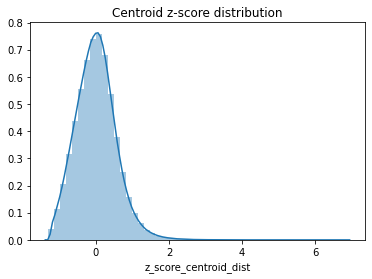

In [10]:
sns.distplot(
    centroid_df['z_score_centroid_dist'],
)
plt.title('Centroid z-score distribution')
plt.show()
plt.close()

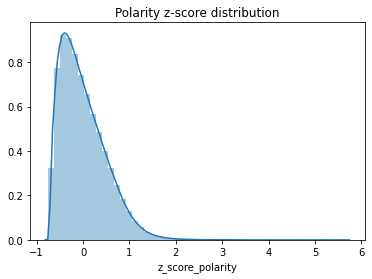

In [9]:
sns.distplot(
    polarity_df['z_score_polarity'],
)
plt.title('Polarity z-score distribution')
plt.show()
plt.close()

In [14]:
cell_ids = centroid_df[centroid_df['z_score_centroid_dist'].gt(4)]['cell_id'].unique()
skew_centroid_df = centroid_df[centroid_df['cell_id'].isin(cell_ids)]
skew_centroid_df.head()

,cell_id,target_molecule_name,num_cell_spots,mean_centroid_dist,z_score_centroid_dist
201094,104219824833050861848495496292093688850,5730522E02Rik,1,8.868535,1.376433
201095,104219824833050861848495496292093688850,Acta2,1,6.391704,0.622463
201096,104219824833050861848495496292093688850,Adamts2,1,14.841440,3.194641
201097,104219824833050861848495496292093688850,Adamts4,1,19.543210,4.625903
201098,104219824833050861848495496292093688850,Adra1b,7,9.384239,1.533419


In [26]:
skew_genes = centroid_df[centroid_df['z_score_centroid_dist'].gt(4)]
skew_genes[skew_genes['num_cell_spots'] == skew_genes['num_cell_spots'].max()]

,cell_id,target_molecule_name,num_cell_spots,mean_centroid_dist,z_score_centroid_dist
4716304,198426927978050439832252189161704654926,Tshz2,52,17.77415,4.087384


In [161]:
cells = pd.read_csv('../processed_data/segmented_cell_shapes.csv')

In [162]:
spots = pd.read_csv('../processed_data/all_passing_rna_spots.csv')

In [38]:
import importlib
importlib.reload(spatial_utils)
x = spatial_utils.spatial_metric_polarity(spots,cells)
x

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_mean_cell_zscore,gene_var_cell_zscore
0,100308840349958208247306404291856115542,Aqp4,10,1,polarity,0.475803,-0.709788,0.133679,0.769889
1,100308840349958208247306404291856115542,Nkain3,10,1,polarity,0.713067,1.116450,0.107606,0.339364
2,100308840349958208247306404291856115542,Pdgfra,10,4,polarity,0.223496,-2.651816,0.048349,0.525211
3,100308840349958208247306404291856115542,Slc32a1,10,1,polarity,1.085463,3.982816,0.158554,0.694936
4,100308840349958208247306404291856115542,Sulf2,10,2,polarity,0.132552,-3.351820,-0.173076,0.567516
...,...,...,...,...,...,...,...,...,...
17801,98798783467407710419408042769213887522,Unc5d,833,10,polarity,1.624332,-0.350186,-0.120286,0.305931
17802,98798783467407710419408042769213887522,Ust,833,4,polarity,1.854313,-0.296852,0.260088,0.343777
17803,98798783467407710419408042769213887522,Wipf3,833,16,polarity,0.879455,-0.522923,-0.041151,7.046855
17804,98798783467407710419408042769213887522,Wnt7b,833,16,polarity,1.481154,-0.383389,-0.028356,0.374255


In [39]:
x[x['target_molecule_name'].eq('Aqp4')]

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_mean_cell_zscore,gene_var_cell_zscore
0,100308840349958208247306404291856115542,Aqp4,10,1,polarity,0.475803,-0.709788,0.133679,0.769889
7,102285207257973934418382294755345807962,Aqp4,183,4,polarity,4.603439,-0.276225,0.133679,0.769889
349,108777605380237370470518059559133717492,Aqp4,986,6,polarity,4.768960,0.316664,0.133679,0.769889
644,114597238652937406513224050654378165312,Aqp4,24,3,polarity,2.677541,1.106961,0.133679,0.769889
663,114874898104826811862719115285298476710,Aqp4,55,2,polarity,2.298142,-0.280493,0.133679,0.769889
...,...,...,...,...,...,...,...,...,...
17128,82835455300097145860879895941306143918,Aqp4,181,1,polarity,7.237804,1.199673,0.133679,0.769889
17195,83944127529680109172385426758335270997,Aqp4,412,1,polarity,6.486073,1.027708,0.133679,0.769889
17355,88153898970041081147874690817564564350,Aqp4,196,1,polarity,6.740140,0.699395,0.133679,0.769889
17491,88262389710779098819830033533248541042,Aqp4,302,1,polarity,6.266796,1.029534,0.133679,0.769889


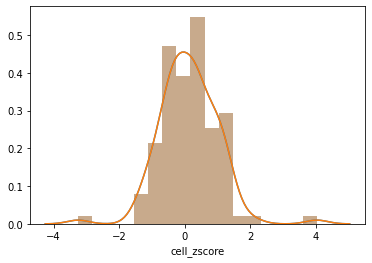

In [35]:
sns.distplot(
    x[x['target_molecule_name'].eq('Aqp4')]['cell_zscore']
)
plt.show()
plt.close()

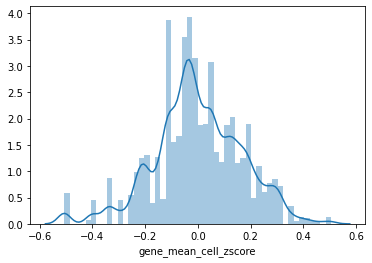

In [41]:
sns.distplot(
    x['gene_mean_cell_zscore']
)
plt.show()
plt.close()

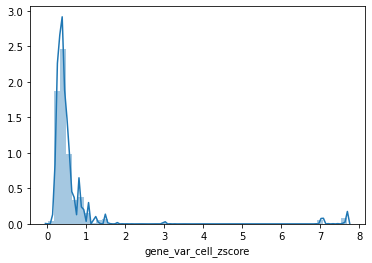

In [40]:
sns.distplot(
    x['gene_var_cell_zscore']
)
plt.show()
plt.close()

In [58]:
x[x['gene_mean_cell_zscore'].eq(x['gene_mean_cell_zscore'].max())]

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_mean_cell_zscore,gene_var_cell_zscore
904,123264269143191309959761097061139375322,Lsp1,102,1,polarity,3.783125,0.886886,0.504615,0.955581
2812,148857227578378146183919567562999497103,Lsp1,515,6,polarity,2.556986,-0.103001,0.504615,0.955581
3383,152794682464554209178921755127717290600,Lsp1,856,1,polarity,8.127824,0.656333,0.504615,0.955581
3772,157522804007545852479919950583615231698,Lsp1,806,1,polarity,7.377684,0.733105,0.504615,0.955581
3849,158313172964360677352633603849801960994,Lsp1,141,2,polarity,2.713246,-0.253179,0.504615,0.955581
3960,162985633052267113558515575704877440230,Lsp1,934,1,polarity,4.927263,0.487559,0.504615,0.955581
4510,17078168129499835112833639841688489000,Lsp1,181,2,polarity,1.152839,-0.571711,0.504615,0.955581
5202,181827361080291761272525653900717098479,Lsp1,644,1,polarity,5.078405,0.476344,0.504615,0.955581
5648,200827884670687749235599255740919855895,Lsp1,18,2,polarity,0.925037,5.368766,0.504615,0.955581
5924,203681250482833975433061374929630211119,Lsp1,1345,1,polarity,6.948146,0.573648,0.504615,0.955581


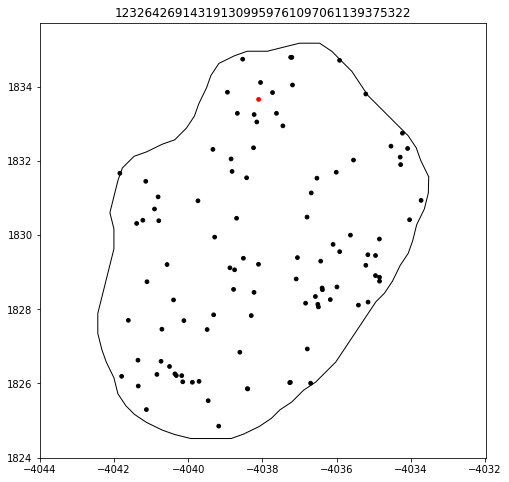

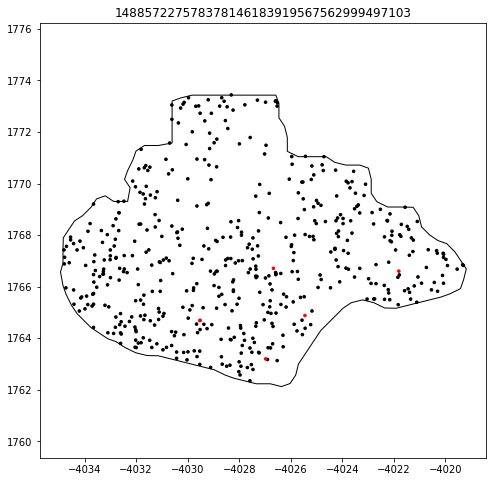

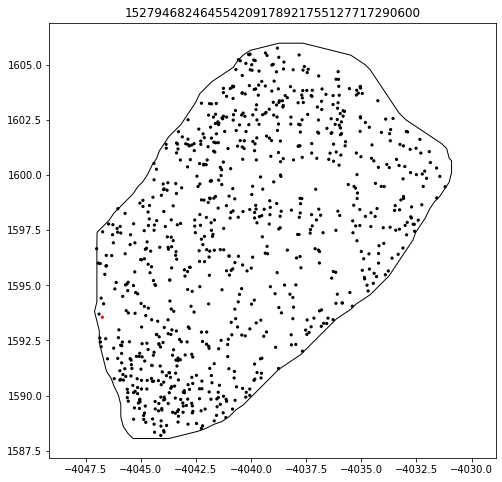

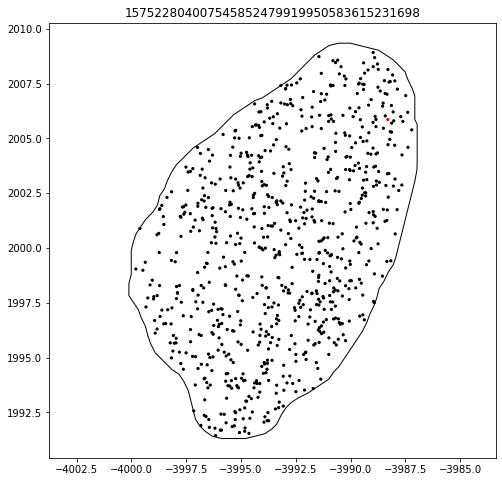

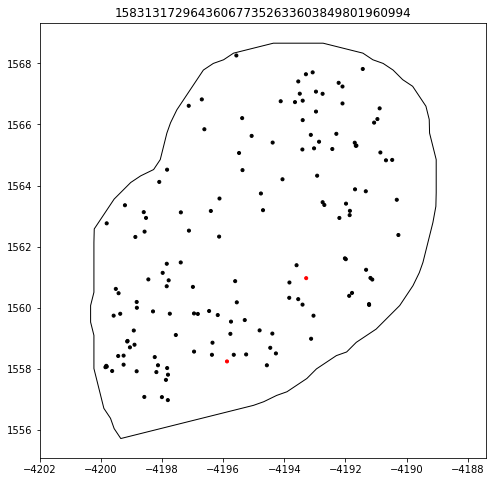

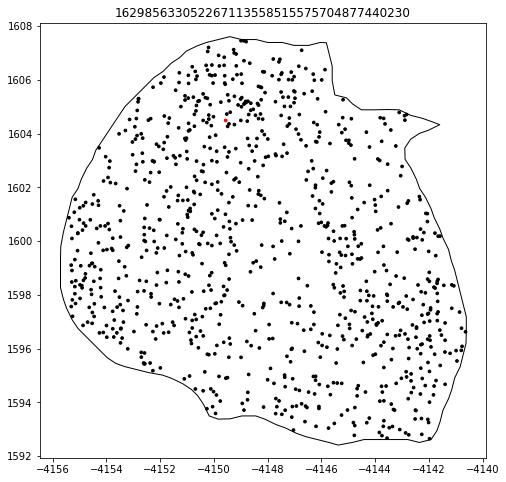

In [79]:
import importlib
importlib.reload(plot_utils)

cell_ids = x[x['target_molecule_name'].eq('Lsp1')]['cell_id'].unique()

for i,cell_id in enumerate(cell_ids):
    
    cells_subset = cells[cells['cell_id'].eq(cell_id)]
    spots_subset = spots[spots['cell_id'].eq(cell_id)]

    plot_utils.plot_spot_cells(spots_subset, cells_subset, spot_colors={'Lsp1':'r'})
    plt.show()
    plt.close()
    
    if i > 4:
        break


In [86]:
x.columns

Index(['cell_id', 'target_molecule_name', 'num_cell_spots', 'num_gene_spots',
       'metric_name', 'raw_metric', 'cell_zscore', 'gene_mean_cell_zscore',
       'gene_var_cell_zscore'],
      dtype='object')

[3]


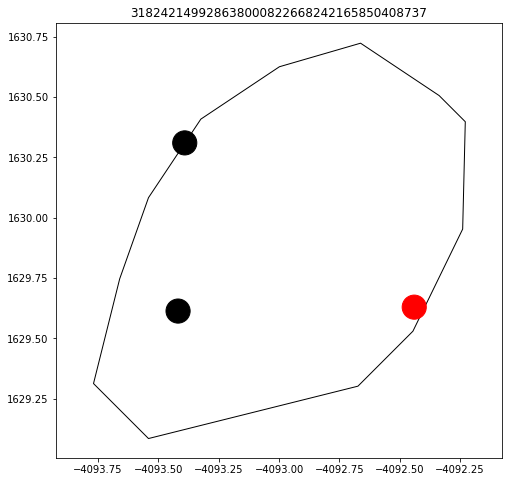

[7]


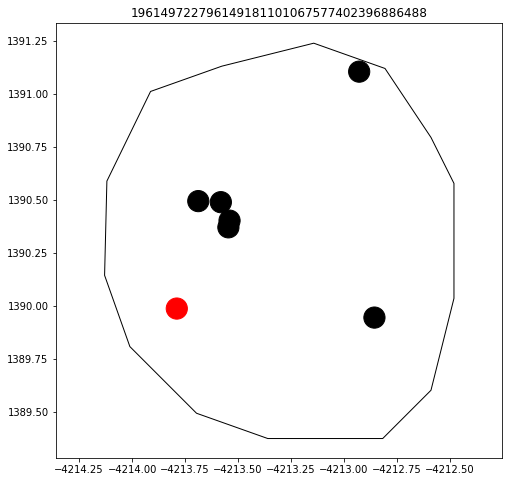

[5]


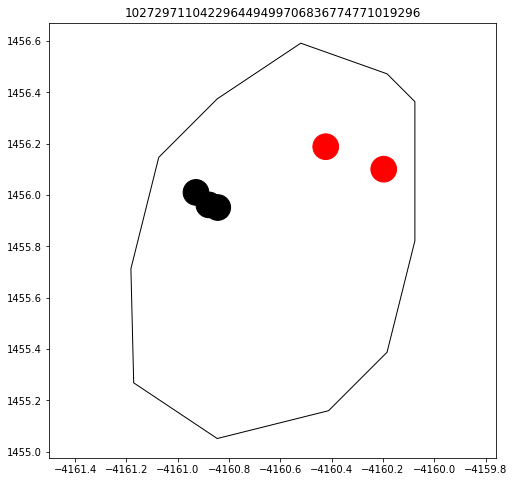

[2]


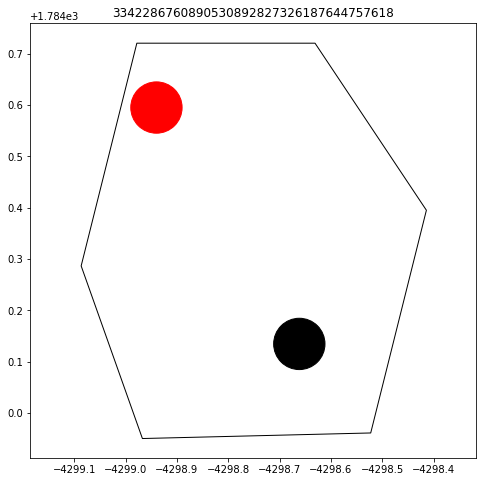

[3]


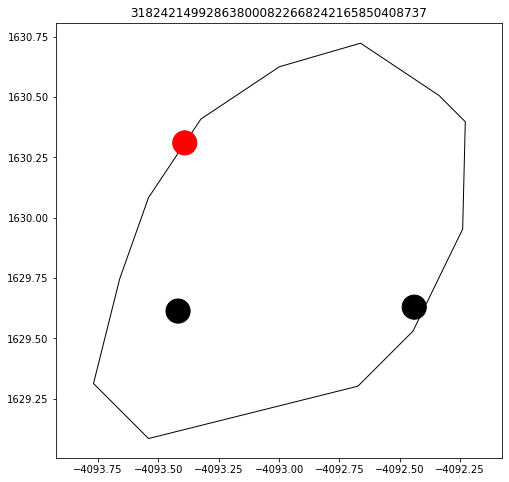

[3]


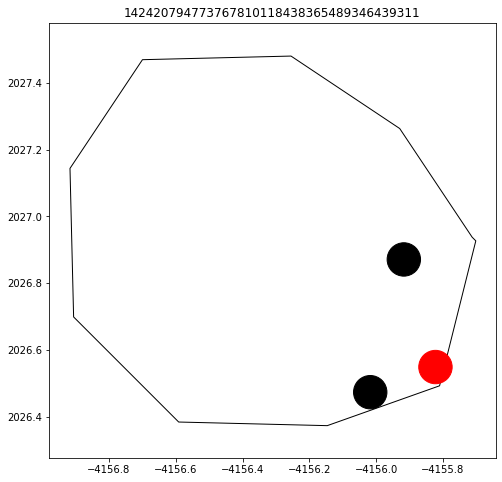

In [87]:
import importlib
importlib.reload(plot_utils)

i = 0
for cell_id,rna in x.sort_values(['cell_zscore'],ascending=False)[['cell_id','target_molecule_name']].values:
    print(x[x['cell_id'].eq(cell_id)]['num_cell_spots'].unique())
    cells_subset = cells[cells['cell_id'].eq(cell_id)]
    spots_subset = spots[spots['cell_id'].eq(cell_id)]

    plot_utils.plot_spot_cells(spots_subset, cells_subset, spot_colors={rna:'r'})
    plt.show()
    plt.close()
    
    if i > 4:
        break
    i += 1

In [51]:
x

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_mean_cell_zscore,gene_var_cell_zscore
0,100308840349958208247306404291856115542,Aqp4,10,1,polarity,0.475803,-0.709788,0.133679,0.769889
1,100308840349958208247306404291856115542,Nkain3,10,1,polarity,0.713067,1.116450,0.107606,0.339364
2,100308840349958208247306404291856115542,Pdgfra,10,4,polarity,0.223496,-2.651816,0.048349,0.525211
3,100308840349958208247306404291856115542,Slc32a1,10,1,polarity,1.085463,3.982816,0.158554,0.694936
4,100308840349958208247306404291856115542,Sulf2,10,2,polarity,0.132552,-3.351820,-0.173076,0.567516
...,...,...,...,...,...,...,...,...,...
17801,98798783467407710419408042769213887522,Unc5d,833,10,polarity,1.624332,-0.350186,-0.120286,0.305931
17802,98798783467407710419408042769213887522,Ust,833,4,polarity,1.854313,-0.296852,0.260088,0.343777
17803,98798783467407710419408042769213887522,Wipf3,833,16,polarity,0.879455,-0.522923,-0.041151,7.046855
17804,98798783467407710419408042769213887522,Wnt7b,833,16,polarity,1.481154,-0.383389,-0.028356,0.374255


In [61]:
x.shape

(17806, 9)

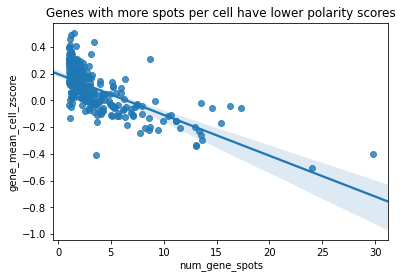

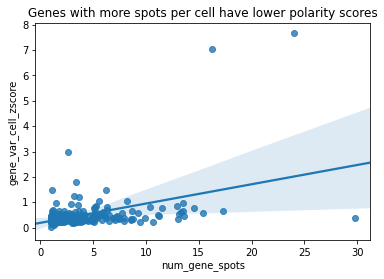

In [69]:
gb_rna = x.groupby('target_molecule_name').mean()

sns.regplot(
    x = gb_rna['num_gene_spots'],
    y = gb_rna['gene_mean_cell_zscore'],
    data = gb_rna,
)
plt.title('Genes with more spots per cell have lower mean polarity scores')
plt.show()
plt.close()

sns.regplot(
    x = gb_rna['num_gene_spots'],
    y = gb_rna['gene_var_cell_zscore'],
    data = gb_rna,
)
plt.title('')
plt.show()
plt.close()

In [88]:
gb_rna.sort_values('gene_var_cell_zscore',ascending=False)

,num_cell_spots,num_gene_spots,raw_metric,cell_zscore,gene_mean_cell_zscore,gene_var_cell_zscore
target_molecule_name,,,,,,
Camk2d,438.434579,24.018692,1.920511,-0.506492,-0.506492,7.680288
Wipf3,504.686747,16.222892,2.205080,-0.041151,-0.041151,7.046855
Gfap,386.714286,2.612245,4.063145,-0.006624,-0.006624,2.996531
Prox1,469.684211,3.368421,3.794979,0.434307,0.434307,1.793470
Grin3a,515.360544,6.210884,2.641447,0.006824,0.006824,1.494811
...,...,...,...,...,...,...
5730522E02Rik,877.714286,1.095238,3.973048,0.141581,0.141581,0.148999
Nxph2,976.636364,1.090909,4.619222,0.199601,0.199601,0.147402
Ccnb1,704.764706,1.176471,4.792890,0.307678,0.307678,0.142227


In [70]:
x.sort_values(['gene_var_cell_zscore'],ascending=False)

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_mean_cell_zscore,gene_var_cell_zscore
4561,171322662692355401858406925158271609449,Camk2d,715,63,polarity,1.768321,-0.367639,-0.506492,7.680288
12052,301272143533585939140611712571540632782,Camk2d,131,1,polarity,3.192090,0.428913,-0.506492,7.680288
11977,298824007896341199258839629748398268587,Camk2d,421,29,polarity,1.528232,-0.404219,-0.506492,7.680288
6207,209814944511977735192358110486068460534,Camk2d,124,2,polarity,1.855164,-0.142106,-0.506492,7.680288
6246,210402596766332090744117172663893143007,Camk2d,338,2,polarity,4.012568,1.144631,-0.506492,7.680288
...,...,...,...,...,...,...,...,...,...
16497,70362899224714468667476564221909416293,Blank-10,1214,1,polarity,5.407458,0.295762,0.290715,0.020314
4028,164448954659990849472783156801485357424,Blank-10,1182,1,polarity,5.538675,0.357858,0.290715,0.020314
8329,234808657374556087197246796806069199476,Blank-10,823,1,polarity,3.268095,0.062369,0.290715,0.020314
8667,236957538029118129571981152381871551600,Blank-10,310,1,polarity,3.503152,0.447496,0.290715,0.020314


In [97]:
x[x['target_molecule_name'].eq('Wipf3')]['cell_zscore'].sort_values()

10801    -4.435212
13113    -2.129120
10389    -1.898875
1742     -1.458749
17488    -1.440142
           ...    
6953      1.476920
13364     1.503629
6471      1.981242
14435     8.910919
13286    31.579128
Name: cell_zscore, Length: 166, dtype: float64

In [76]:
x[x['target_molecule_name'].eq('Camk2d')]['cell_zscore'].min()

-39.68007923500804

In [98]:
x[x['cell_zscore'].eq(x['cell_zscore'].max())].T

,13286
cell_id,318242149928638000822668242165850408737
target_molecule_name,Wipf3
num_cell_spots,3
num_gene_spots,1
metric_name,polarity
raw_metric,0.598297
cell_zscore,31.5791
gene_mean_cell_zscore,-0.0411511
gene_var_cell_zscore,7.04686


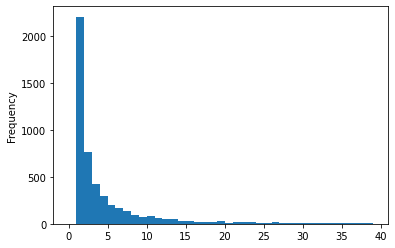

In [108]:
df['num_cell_spots'].plot.hist(bins=np.arange(0,40))
plt.show()
plt.close()

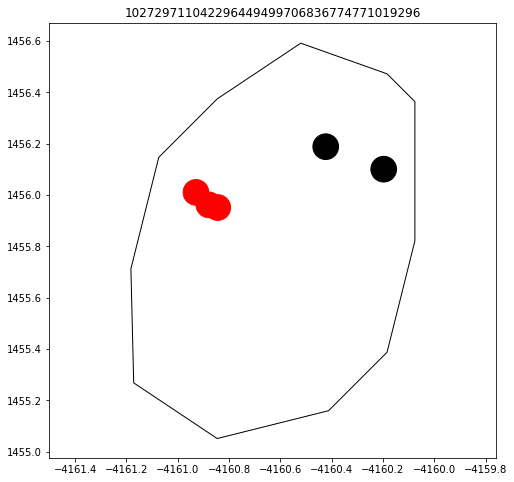

In [103]:
cell_id = '102729711042296449499706836774771019296'
cells_subset = cells[cells['cell_id'].eq(cell_id)]
spots_subset = spots[spots['cell_id'].eq(cell_id)]

plot_utils.plot_spot_cells(spots_subset, cells_subset, spot_colors={'Gfap':'r'})
plt.show()
plt.close()


In [95]:
x[x['cell_zscore'].isnull()]

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_mean_cell_zscore,gene_var_cell_zscore
460,109929266302657667479951842299068044588,Pdgfra,1,1,polarity,4.309196,NaN,0.048349,0.525211
2403,14190489422337363087062907804027192774,Shisa9,2,2,polarity,0.245387,NaN,-0.196061,0.662218
5496,194414407582304055976512246378449525640,Ctss,1,1,polarity,0.274381,NaN,0.097255,0.798320
5593,196891821898585144267875353611702695106,Camk2d,1,1,polarity,0.237034,NaN,-0.506492,7.680288
5720,202095924516313091764352786219331616590,Prdm8,1,1,polarity,0.202236,NaN,-0.186497,0.274502
11293,288609466213327128851653010164660949037,Ctss,1,1,polarity,0.245225,NaN,0.097255,0.798320


In [102]:
x[x['target_molecule_name'].eq('Gfap')].sort_values(['cell_zscore'],ascending=False)

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_mean_cell_zscore,gene_var_cell_zscore
5588,196149722796149181101067577402396886488,Gfap,7,1,polarity,0.459271,1.917163,-0.006624,2.996531
7337,221485959574229496424909441011377525205,Gfap,318,1,polarity,7.451773,1.892441,-0.006624,2.996531
2589,14467234172742592340828313457883992267,Gfap,174,1,polarity,4.559757,1.833822,-0.006624,2.996531
16440,69533107752676074095116404141228423160,Gfap,153,1,polarity,9.268465,1.821327,-0.006624,2.996531
13689,326700220955531779039034366972004049556,Gfap,288,1,polarity,6.117370,1.275399,-0.006624,2.996531
7481,221863271823257786022164825195009492689,Gfap,188,1,polarity,7.284308,1.242144,-0.006624,2.996531
15347,4453155857413334123436694392053062799,Gfap,43,1,polarity,3.732742,1.204774,-0.006624,2.996531
7669,222731768422977059900227969363435857833,Gfap,877,1,polarity,7.339875,1.088838,-0.006624,2.996531
16537,70362899224714468667476564221909416293,Gfap,1214,1,polarity,9.648840,1.053353,-0.006624,2.996531
8236,234486847068466569171294549799527313218,Gfap,523,1,polarity,6.676009,0.986548,-0.006624,2.996531


# Checking polarity scores from the entire db

In [109]:
df = pd.read_csv('../sbatch_scripts/20210111_polarity.csv')
df.head()

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_mean_cell_zscore,gene_var_cell_zscore
0,10000143038275111136124942858811168393,Adra1b,161,1,polarity,2.779945,-0.102875,-0.070118,1.798688
1,10000143038275111136124942858811168393,Aqp4,161,1,polarity,3.808437,0.313481,0.139299,4.339372
2,10000143038275111136124942858811168393,Bcl11b,161,1,polarity,5.658580,1.062459,-0.176310,125.465743
3,10000143038275111136124942858811168393,Brinp3,161,1,polarity,4.015005,0.397104,0.019127,0.417702
4,10000143038275111136124942858811168393,Cdh20,161,3,polarity,1.657094,-0.557429,-0.011625,0.441740


In [123]:
df.drop_duplicates('cell_id')['num_cell_spots'].lt(200).sum()

109784

In [119]:
df.drop_duplicates('cell_id')['num_cell_spots'].median()

227.0

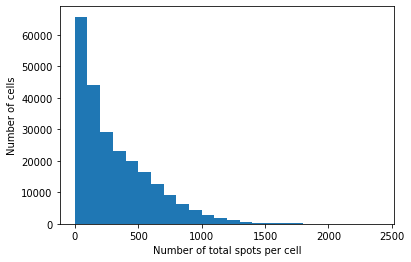

In [117]:
df.drop_duplicates('cell_id')['num_cell_spots'].plot.hist(bins = np.arange(0,2500,100))
plt.xlabel('Number of total spots per cell')
plt.ylabel('Number of cells')
plt.show()
plt.close()

In [125]:
num_uniq_genes_per_cell = df.groupby('cell_id')['target_molecule_name'].unique().apply(len)
num_uniq_genes_per_cell

cell_id
10000143038275111136124942858811168393      41
100007228202835962319771548915451072492     25
100013893144618144270850756017896167367     63
100017533667894826939857215877082515137     31
100018547319796564052034805202079258035     23
                                          ... 
99987465505639073211021560543065098772     103
99989592830367590092304100078674096866      50
99991756591196613545069880666241120777      19
99997421766159526763299676887100858104      43
99997470167777465101376150817407669505      97
Name: target_molecule_name, Length: 237949, dtype: int64

In [132]:
num_uniq_genes_per_cell.max()

175

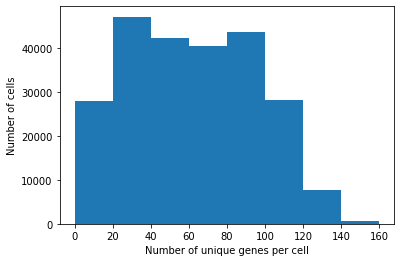

In [134]:
num_uniq_genes_per_cell.plot.hist(bins=np.arange(0,175,20))
plt.xlabel('Number of unique genes per cell')
plt.ylabel('Number of cells')
plt.show()
plt.close()

In [135]:
num_uniq_genes_per_cell.mean()

61.42465402250062

In [112]:
df['cell_id'].unique().size

237949

In [110]:
df.shape

(14615935, 9)

In [136]:
df['num_gene_spots'].max()

507

In [142]:
gc_spots = df.groupby(
    ['cell_id','target_molecule_name']
)['num_gene_spots'].mean()

In [149]:
df.groupby(
    ['cell_id','target_molecule_name']
).size().max()

1

In [165]:
df.sort_values(['num_gene_spots'],ascending=False)

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_mean_cell_zscore,gene_var_cell_zscore
5910295,223362223687414949156175181022110990143,Nos1,1484,507,polarity,3.767188,-0.206997,0.054853,0.451457
8462923,276785725982585171224664721857787439677,Igfbp5,1589,440,polarity,1.022110,-0.425487,-0.150119,155.720068
4379898,191419978196149680413884467591171586223,Nos1,1129,422,polarity,0.672286,-0.437418,0.054853,0.451457
8439889,276299646871344870670970867961798443463,Igf2,1073,421,polarity,0.282270,-0.538434,0.001067,10.812635
957313,120033446395465634483403839272722069243,Igfbp5,1389,413,polarity,0.747405,-0.481423,-0.150119,155.720068
...,...,...,...,...,...,...,...,...,...
9156961,291205904610335975176417193303003244923,Fezf2,829,1,polarity,3.837945,0.063861,-0.087646,0.526933
9156960,291205904610335975176417193303003244923,Fam84b,829,1,polarity,7.610143,0.782378,0.155154,0.391279
3390014,170526894119151819500738438858345511267,Col24a1,796,1,polarity,4.977998,0.394876,-0.003166,0.280456
9156957,291205904610335975176417193303003244923,Egr2,829,1,polarity,4.334169,0.158380,0.123878,0.296846


In [163]:
print('hello world')

hello world


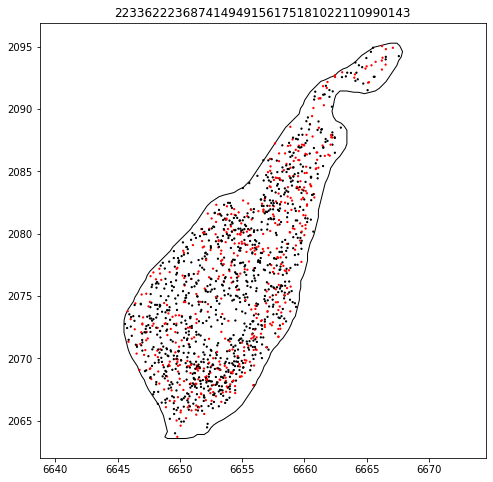

In [164]:
cell_id = '223362223687414949156175181022110990143'
cells_subset = cells[cells['cell_id'].eq(cell_id)]
spots_subset = spots[spots['cell_id'].eq(cell_id)]

plot_utils.plot_spot_cells(
    spots_subset,
    cells_subset,
    spot_colors={'Nos1':'r'}
)
plt.show()
plt.close()

In [158]:
df['num_gene_spots'].quantile([0.25, 0.50, 0.75,0.99])

0.25     1.0
0.50     2.0
0.75     5.0
0.99    46.0
Name: num_gene_spots, dtype: float64

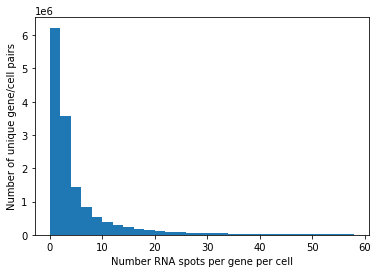

In [147]:
gc_spots.plot.hist(bins=np.arange(0,60,2))
plt.xlabel('Number RNA spots per gene per cell')
plt.ylabel('Number of unique gene/cell pairs')
plt.show()
plt.close()

In [173]:
df[df['cell_id'].eq('249899781435579384014658400891303707895')]

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_mean_cell_zscore,gene_var_cell_zscore
7173448,249899781435579384014658400891303707895,Prr16,2,1,polarity,0.229097,6048.382086,0.070656,430.566523
7173449,249899781435579384014658400891303707895,Ptprk,2,1,polarity,0.228932,-6048.382086,-0.239577,260.029808


In [170]:
df[df['cell_zscore'].eq(df['cell_zscore'].min())]

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_mean_cell_zscore,gene_var_cell_zscore
7173449,249899781435579384014658400891303707895,Ptprk,2,1,polarity,0.228932,-6048.382086,-0.239577,260.029808


In [176]:
min_allowed_cell_spots = [0,10,50,100,200]
for min_allowed in min_allowed_cell_spots:
    print(min_allowed,df[df['num_cell_spots'].gt(min_allowed)]['cell_zscore'].max())

0 6048.3820862104785
10 16.400559062937194
50 7.441278192834519
100 5.574886241420024
200 4.759273118819227


In [172]:
df[df['cell_zscore'].eq(df['cell_zscore'].max())]

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_mean_cell_zscore,gene_var_cell_zscore
7173448,249899781435579384014658400891303707895,Prr16,2,1,polarity,0.229097,6048.382086,0.070656,430.566523


In [ ]:
df = df[df['num_cell_spots'].gt(50)]

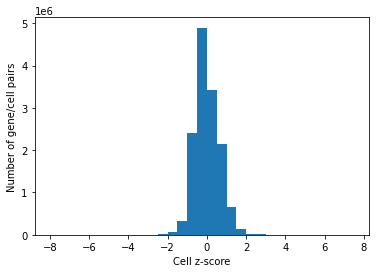

In [179]:
df['cell_zscore'].plot.hist(bins=np.arange(-8,8,0.5))
plt.xlabel('Cell z-score')
plt.ylabel('Number of gene/cell pairs')
plt.show()
plt.close()

target_molecule_name
1700022I11Rik     [0.3003224980401564]
1810046K07Rik     [0.2883226245411528]
5031425F14Rik    [0.29176243928624285]
5730522E02Rik    [0.27791304646623416]
Acta2             [3.5601233578905918]
                         ...          
Vtn               [7.2223810821699965]
Vwc2             [0.33272688723987953]
Wipf3              [2.777556029734527]
Wnt7b             [0.6689484418949979]
Zfp804b          [0.32959204320457863]
Name: gene_var_cell_zscore, Length: 252, dtype: object

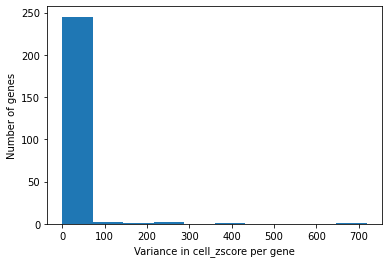

In [185]:
df.drop_duplicates('target_molecule_name')['gene_var_cell_zscore'].plot.hist()
plt.xlabel('Variance in cell_zscore per gene')
plt.ylabel('Number of genes')
plt.show()
plt.close()

In [186]:
dedup_genes = df.drop_duplicates('target_molecule_name')
display(dedup_genes.shape)
dedup_genes.head()

(252, 9)

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_mean_cell_zscore,gene_var_cell_zscore
0,10000143038275111136124942858811168393,Adra1b,161,1,polarity,2.779945,-0.102875,-0.070118,1.798688
1,10000143038275111136124942858811168393,Aqp4,161,1,polarity,3.808437,0.313481,0.139299,4.339372
2,10000143038275111136124942858811168393,Bcl11b,161,1,polarity,5.658580,1.062459,-0.176310,125.465743
3,10000143038275111136124942858811168393,Brinp3,161,1,polarity,4.015005,0.397104,0.019127,0.417702
4,10000143038275111136124942858811168393,Cdh20,161,3,polarity,1.657094,-0.557429,-0.011625,0.441740


In [200]:
dedup_genes.sort_values('gene_var_cell_zscore',ascending=False).head(13)[['target_molecule_name','gene_mean_cell_zscore','gene_var_cell_zscore']]

,target_molecule_name,gene_mean_cell_zscore,gene_var_cell_zscore
6,Ctss,0.347689,719.009915
25,Prr16,0.070656,430.566523
149,Ptprk,-0.239577,260.029808
16,Luzp2,-0.017275,220.090336
13,Igfbp5,-0.150119,155.720068
92,Iqgap2,-0.026259,127.131917
2,Bcl11b,-0.176310,125.465743
23,Pou3f3,-0.308569,71.024548
169,Gfap,0.068057,68.889394
137,Cux2,-0.251472,31.210345


4.425317566214821


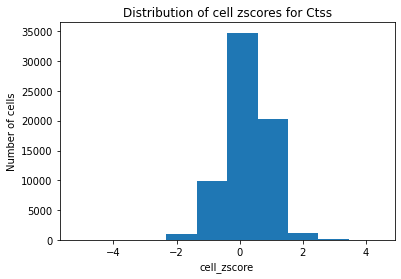

3.994253200843609


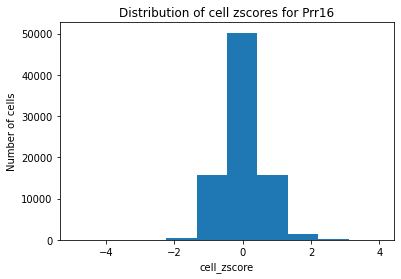

5.357717977293784


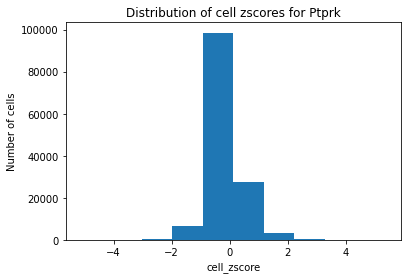

6.037439091110038


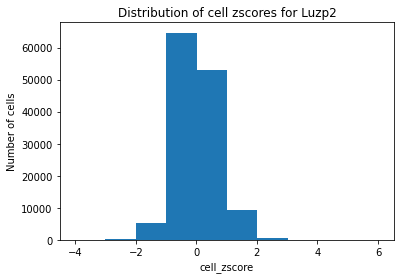

5.198066480379175


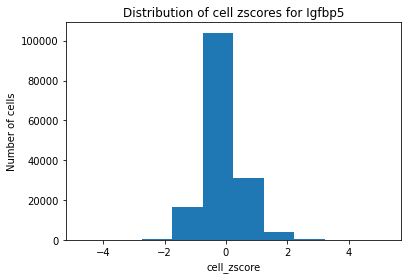

4.015386691512002


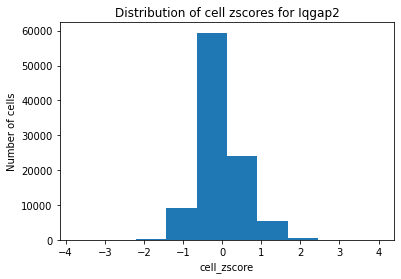

6.504171896177198


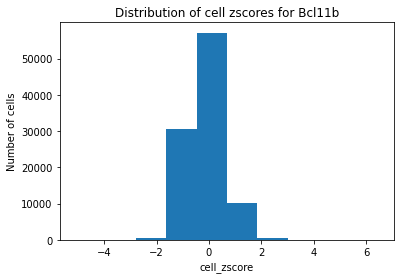

4.662236141777723


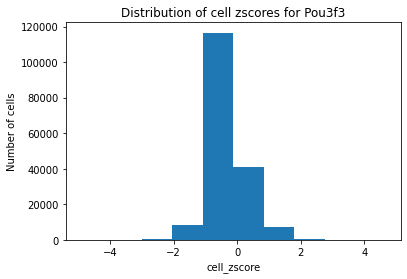

5.667642283344714


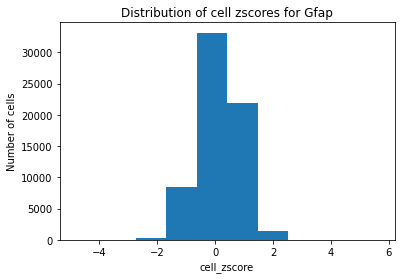

4.783607873467572


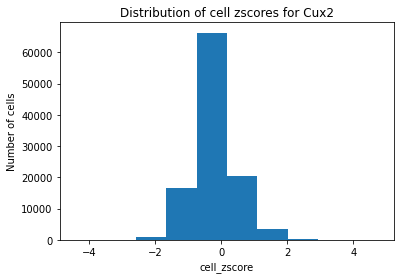

3.31139413542888


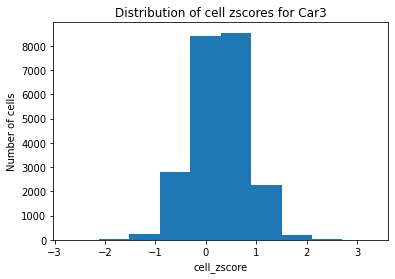

3.503815283446728


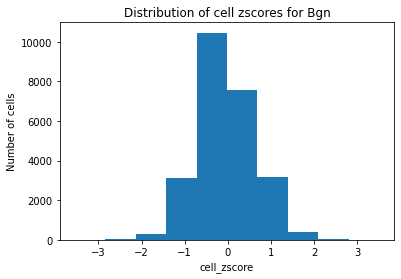

3.464789399146273


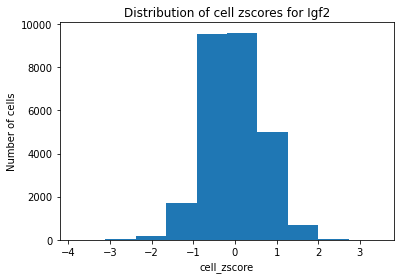

In [203]:
genes = dedup_genes.sort_values('gene_var_cell_zscore',ascending=False).head(13)['target_molecule_name']
for gene in genes:
    print(df[df['target_molecule_name'].eq(gene)]['cell_zscore'].max())
    df[df['target_molecule_name'].eq(gene)]['cell_zscore'].plot.hist()
    plt.title('Distribution of cell zscores for {}'.format(gene))
    plt.xlabel('cell_zscore')
    plt.ylabel('Number of cells')
    plt.show()
    plt.close()

In [204]:
for gene in genes:
    print(gene,df[df['target_molecule_name'].eq(gene)]['cell_id'].unique().size)

Ctss 67340
Prr16 83598
Ptprk 136480
Luzp2 133185
Igfbp5 156289
Iqgap2 98890
Bcl11b 98774
Pou3f3 174419
Gfap 65266
Cux2 107693
Car3 22505
Bgn 25102
Igf2 26790


In [208]:
ctss_df = df[df['target_molecule_name'].eq('Ctss')]
ctss_df[ctss_df['cell_zscore'].eq(ctss_df['cell_zscore'].max())]

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_mean_cell_zscore,gene_var_cell_zscore
9638739,301600819310507129880007098931172999044,Ctss,135,1,polarity,2.376199,4.425318,0.347689,719.009915


In [209]:
ctss_df[ctss_df['cell_zscore'].eq(ctss_df['cell_zscore'].min())]

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_mean_cell_zscore,gene_var_cell_zscore
3776836,178662736311309749897474716644831816348,Ctss,89,14,polarity,0.650834,-5.220444,0.347689,719.009915


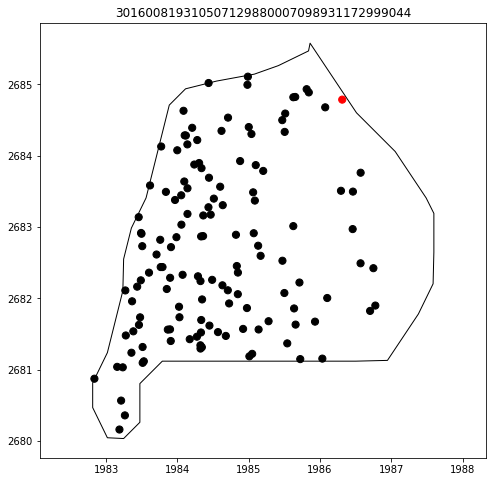

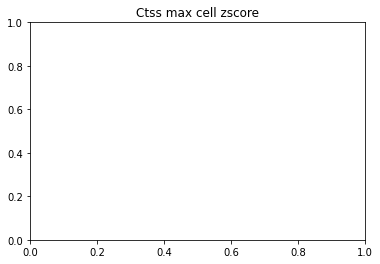

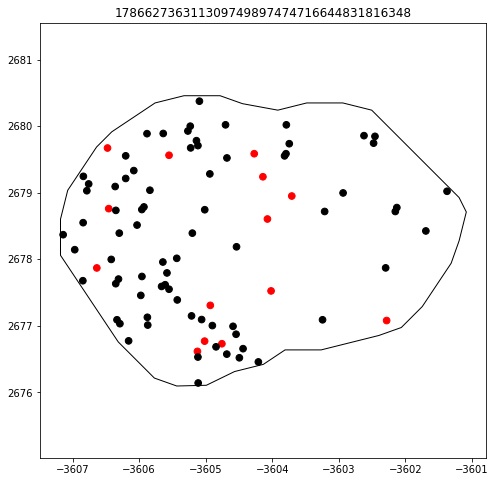

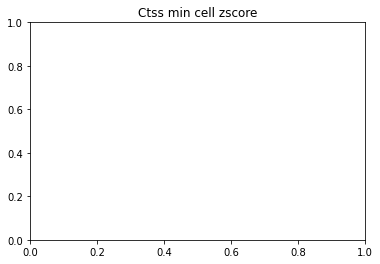

In [210]:
cell_id = '301600819310507129880007098931172999044'
cells_subset = cells[cells['cell_id'].eq(cell_id)]
spots_subset = spots[spots['cell_id'].eq(cell_id)]

plot_utils.plot_spot_cells(
    spots_subset,
    cells_subset,
    spot_colors={'Ctss':'r'}
)
plt.title('Ctss max cell zscore')
plt.show()
plt.close()

cell_id = '178662736311309749897474716644831816348'
cells_subset = cells[cells['cell_id'].eq(cell_id)]
spots_subset = spots[spots['cell_id'].eq(cell_id)]


plot_utils.plot_spot_cells(
    spots_subset,
    cells_subset,
    spot_colors={'Ctss':'r'}
)
plt.title('Ctss min cell zscore')
plt.show()
plt.close()

# Fixing variance calculation error

Getting variances in the 100's (nearly 1000's) and I'm sure this is incorrect

The var is calculated in the wrapper function to the metrics in the spatial_utils.py

`df['gene_var_cell_zscore'] = df.groupby('target_molecule_name')['cell_zscore'].transform('std')**2`

Looking at the line, I think it is correct.
I'm finding the standard dev of a given gene over all cells in the cell_zscore metric then squaring it

In [2]:
df = pd.read_csv('../sbatch_scripts/20210111_polarity.csv')
df.head()

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_mean_cell_zscore,gene_var_cell_zscore
0,10000143038275111136124942858811168393,Adra1b,161,1,polarity,2.779945,-0.102875,-0.070118,1.798688
1,10000143038275111136124942858811168393,Aqp4,161,1,polarity,3.808437,0.313481,0.139299,4.339372
2,10000143038275111136124942858811168393,Bcl11b,161,1,polarity,5.658580,1.062459,-0.176310,125.465743
3,10000143038275111136124942858811168393,Brinp3,161,1,polarity,4.015005,0.397104,0.019127,0.417702
4,10000143038275111136124942858811168393,Cdh20,161,3,polarity,1.657094,-0.557429,-0.011625,0.441740


In [3]:
#Making sure that for each gene, there is only one gene_mean_cell_zscore
df.groupby('target_molecule_name')['gene_mean_cell_zscore'].unique().apply(len).max()

1

In [4]:
#Making sure that for each gene, there is only one gene_var_cell_zscore
df.groupby('target_molecule_name')['gene_var_cell_zscore'].unique().apply(len).max()

1

In [5]:
#Checking the gene_mean_cell_zscore

gene = 'Adra1b'

gene_means = df.groupby('target_molecule_name')['cell_zscore'].mean()

df['recalc_gene_mean'] = df['target_molecule_name'].map(gene_means)

#see if any gene has a mismatch between the two methods larger than 0.01 (can't test exact, floats)
df[np.abs(df['gene_mean_cell_zscore'] - df['recalc_gene_mean']) > 0.01]


,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_mean_cell_zscore,gene_var_cell_zscore,recalc_gene_mean


In [6]:
#Checking the gene_var_cell_zscore

gene = 'Adra1b'

gene_vars = df.groupby('target_molecule_name')['cell_zscore'].std()**2

df['recalc_gene_var'] = df['target_molecule_name'].map(gene_vars)

#see if any gene has a mismatch between the two methods larger than 0.01 (can't test exact, floats)
df[np.abs(df['gene_var_cell_zscore'] - df['recalc_gene_var']) > 0.01]

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_mean_cell_zscore,gene_var_cell_zscore,recalc_gene_mean,recalc_gene_var


## The checks above make me confused because they are suggesting that the var is being calculated correctly.

I'll directly look at the suspicious vars

In [7]:
(
    df.drop_duplicates('target_molecule_name')
      .sort_values(['gene_var_cell_zscore'], ascending=False)[
          ['target_molecule_name','gene_var_cell_zscore']
      ]
)

,target_molecule_name,gene_var_cell_zscore
6,Ctss,719.009915
25,Prr16,430.566523
149,Ptprk,260.029808
16,Luzp2,220.090336
13,Igfbp5,155.720068
...,...,...
929,Blank-4,0.279221
129,5730522E02Rik,0.277913
602,Muc20,0.273609
524,Lyzl4,0.271470


In [8]:
df[df['target_molecule_name'].eq('Ctss')]['cell_zscore'].std()**2

719.0099154434744

In [9]:
df[df['target_molecule_name'].eq('Prr16')]['cell_zscore'].std()**2

430.5665234107568

## Now I'm convinced the variance is being calculated correctly
But why is it so high?

In [10]:
df[df['target_molecule_name'].eq('Ctss')]['cell_zscore'].max()

5565.766984063788

In [11]:
df[df['target_molecule_name'].eq('Ctss')]['cell_zscore'].min()

-451.66258387513716

because there are huge outliers on the cell_zscores

In [12]:
#df['cell_zscore'].plot.density()
#plt.show()
#plt.close()

In [13]:
df['cell_zscore'].min()

-6048.3820862084485

In [14]:
df[df['num_cell_spots'].gt(50)]['cell_zscore'].min()

-6.437304255577929

In [15]:
#Filtering out bad cells with too few cell spots then recalculating mean and var cell_zscores
df = pd.read_csv('../sbatch_scripts/20210111_polarity.csv')

df = df[df['num_cell_spots'].gt(50)]
df['gene_mean_cell_zscore'] = df.groupby('target_molecule_name')['cell_zscore'].transform('mean')
df['gene_var_cell_zscore'] = df.groupby('target_molecule_name')['cell_zscore'].transform('std')**2

df.head()

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_mean_cell_zscore,gene_var_cell_zscore
0,10000143038275111136124942858811168393,Adra1b,161,1,polarity,2.779945,-0.102875,-0.075776,0.350045
1,10000143038275111136124942858811168393,Aqp4,161,1,polarity,3.808437,0.313481,0.146770,0.476221
2,10000143038275111136124942858811168393,Bcl11b,161,1,polarity,5.658580,1.062459,-0.145418,0.374873
3,10000143038275111136124942858811168393,Brinp3,161,1,polarity,4.015005,0.397104,0.016483,0.340233
4,10000143038275111136124942858811168393,Cdh20,161,3,polarity,1.657094,-0.557429,-0.015703,0.359441


In [16]:
df['gene_var_cell_zscore'].max()

0.6352810548530714

In [17]:
df['gene_var_cell_zscore'].min()

0.24905019320685884

In [18]:
df.shape

(14130483, 9)

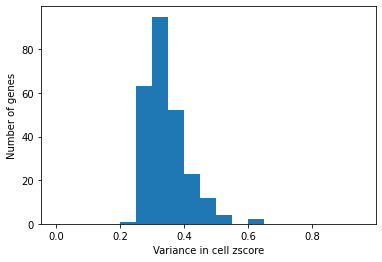

In [23]:
genes_df = df.drop_duplicates('target_molecule_name')
genes_df['gene_var_cell_zscore'].plot.hist(bins=np.arange(0,1,0.05))
plt.xlabel('Variance in cell zscore')
plt.ylabel('Number of genes')
plt.show()
plt.close()